# Predicting PV Installation

In [57]:
%matplotlib inline

import os
import requests
import pandas as pd 
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix

from sklearn import cross_validation as cv
from sklearn.cross_validation import train_test_split as tts

from sklearn.linear_model import Ridge
from sklearn.linear_model import RandomizedLasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [58]:
installation = pd.read_csv('/Users/graceluningfu/Documents/505workshop/machine-learning/notebook/data/instances_feature_set7.csv', sep=",")

In [59]:
installation.head()

,sfh_qty,th_qty,households,hhincome_below_10k,hhincome_10_below_15k,hhincome_15_below_25k,hhincome_25_below_35k,hhincome_35_below_50k,hhincome_50_below_75k,hhincome_75_below_100k,hhincome_100_below_150k,hhincome_150_below_200k,hhincome_above_200k,avg_rtl_price,dem_share,year_since_1990,count
0,31285,1032,36435,3024,2368,5064,4117,5465,7032,4044,3571,984,802,10.31,0.448964,24.00,1
1,31285,1032,36435,3024,2368,5064,4117,5465,7032,4044,3571,984,802,10.31,0.448964,22.25,1
2,31285,1032,36435,3024,2368,5064,4117,5465,7032,4044,3571,984,802,10.31,0.448964,21.25,1
3,31285,1032,36435,3024,2368,5064,4117,5465,7032,4044,3571,984,802,10.31,0.448964,20.00,1
4,204398,18020,299764,23681,15588,31775,30876,41367,52758,38070,39869,14389,11691,15.28,0.577781,26.00,83


In [60]:
installation.columns = ['sfh_qty','th_qty','households','hhincome_below_10k','hhincome_10_below_15k',\
                  'hhincome_15_below_25','hhincome_25_below_35k','hhincome_35_below_50k','hhincome_50_below_75k',\
                  'hhincome_75_below_100', 'hhincome_100_below_150k','hhincome_150_below_200k','hhincome_above_200k',\
                 'avg_rtl_price','dem_share', 'year_since_1990', 'count']

installation.head()

,sfh_qty,th_qty,households,hhincome_below_10k,hhincome_10_below_15k,hhincome_15_below_25,hhincome_25_below_35k,hhincome_35_below_50k,hhincome_50_below_75k,hhincome_75_below_100,hhincome_100_below_150k,hhincome_150_below_200k,hhincome_above_200k,avg_rtl_price,dem_share,year_since_1990,count
0,31285,1032,36435,3024,2368,5064,4117,5465,7032,4044,3571,984,802,10.31,0.448964,24.00,1
1,31285,1032,36435,3024,2368,5064,4117,5465,7032,4044,3571,984,802,10.31,0.448964,22.25,1
2,31285,1032,36435,3024,2368,5064,4117,5465,7032,4044,3571,984,802,10.31,0.448964,21.25,1
3,31285,1032,36435,3024,2368,5064,4117,5465,7032,4044,3571,984,802,10.31,0.448964,20.00,1
4,204398,18020,299764,23681,15588,31775,30876,41367,52758,38070,39869,14389,11691,15.28,0.577781,26.00,83


In [61]:
installation.describe()

,sfh_qty,th_qty,households,hhincome_below_10k,hhincome_10_below_15k,hhincome_15_below_25,hhincome_25_below_35k,hhincome_35_below_50k,hhincome_50_below_75k,hhincome_75_below_100,hhincome_100_below_150k,hhincome_150_below_200k,hhincome_above_200k,avg_rtl_price,dem_share,year_since_1990,count
count,1.218300e+04,12183.000000,1.218300e+04,12183.000000,12183.000000,12183.000000,12183.00000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000,12183.000000
mean,9.477498e+04,11855.355988,1.514793e+05,9904.232209,7413.614873,14617.154067,13903.12657,18675.860543,25790.913978,18517.158335,22075.024871,9768.778462,10777.460560,12.814342,0.504369,21.251457,57.193138
std,1.692525e+05,29376.307979,2.979526e+05,20764.223874,16220.992905,30396.241911,28238.40123,37274.340888,49944.578569,35286.566071,42472.819528,19695.904649,24262.084539,2.877587,0.138584,3.304270,271.266667
min,6.520000e+02,1.000000,6.710000e+02,52.000000,7.000000,98.000000,88.00000,92.000000,123.000000,66.000000,16.000000,0.000000,0.000000,8.190000,0.001713,9.250000,1.000000
25%,1.983900e+04,571.000000,2.213300e+04,1382.000000,1260.000000,2439.000000,2371.00000,3205.000000,4292.000000,2764.000000,2514.000000,679.000000,515.000000,10.310000,0.405301,19.250000,1.000000
50%,4.186000e+04,2647.000000,5.524000e+04,3591.000000,2788.000000,5611.000000,5455.00000,7404.000000,10181.000000,7194.000000,7536.000000,2585.000000,1942.000000,13.740000,0.500273,21.750000,4.000000
75%,1.082075e+05,10398.000000,1.663450e+05,9557.000000,7182.000000,15979.000000,15074.00000,20543.000000,29378.500000,22712.000000,25601.000000,11488.000000,9482.000000,15.420000,0.597897,24.000000,18.000000
max,1.721774e+06,392510.000000,3.263069e+06,215363.000000,189258.000000,345885.000000,313255.00000,407884.000000,541669.000000,378516.000000,443777.000000,195784.000000,228415.000000,17.770000,0.913638,26.000000,8054.000000


## Are the features predictive?

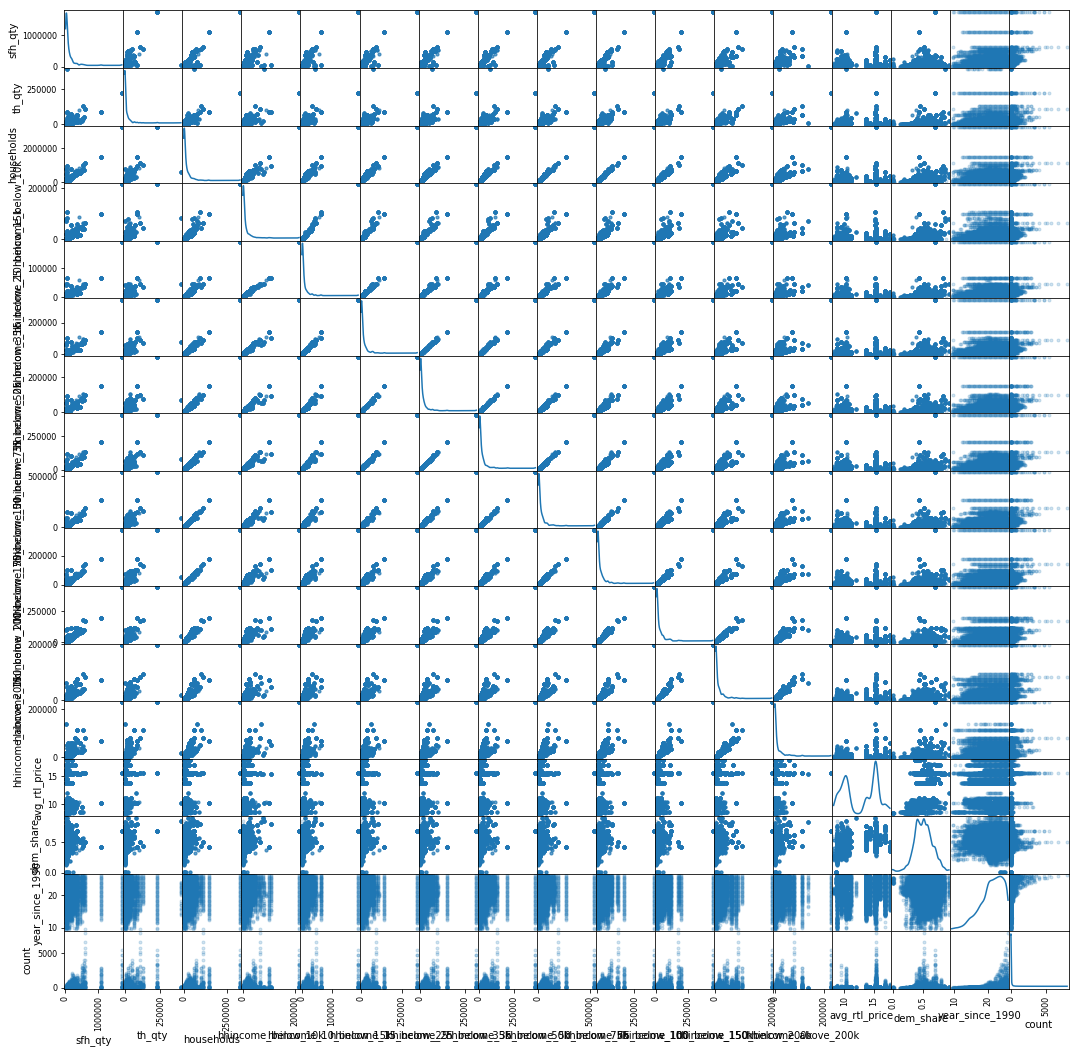

In [62]:
scatter_matrix(installation, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [63]:
installation_features = installation.ix[:,0:16]
installation_labels = installation.ix[:,16:]

In [64]:
model = RandomizedLasso(alpha=0.1)
model.fit(installation_features, installation_labels["count"])
names = list(installation_features)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), model.scores_), 
                 names), reverse=True))

Features sorted by their score:
[(1.0, 'year_since_1990'), (0.80000000000000004, 'avg_rtl_price'), (0.65000000000000002, 'sfh_qty'), (0.35999999999999999, 'hhincome_100_below_150k'), (0.32000000000000001, 'hhincome_150_below_200k'), (0.25, 'hhincome_75_below_100'), (0.13, 'th_qty'), (0.055, 'hhincome_50_below_75k'), (0.050000000000000003, 'hhincome_above_200k'), (0.035000000000000003, 'hhincome_35_below_50k'), (0.014999999999999999, 'households'), (0.01, 'hhincome_15_below_25'), (0.0, 'hhincome_below_10k'), (0.0, 'hhincome_25_below_35k'), (0.0, 'hhincome_10_below_15k'), (0.0, 'dem_share')]


In [65]:
"""for another label/outcome
model = RandomizedLasso(alpha=0.1)
model.fit(installation_features, installation_labels["total"])
names = list(installation_features)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), model.scores_), 
                 names), reverse=True))
"""

'for another label/outcome\nmodel = RandomizedLasso(alpha=0.1)\nmodel.fit(installation_features, installation_labels["total"])\nnames = list(installation_features)\n\nprint("Features sorted by their score:")\nprint(sorted(zip(map(lambda x: round(x, 4), model.scores_), \n                 names), reverse=True))\n'

## Let's focus on predicting installation

In [66]:
installation_labels = installation.ix[:,16]

In [67]:
splits = cv.train_test_split(installation_features, installation_labels, test_size=0.2)
X_train, X_test, y_train, y_test = splits

In [68]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Ridge Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Ridge Regression model
Mean Squared Error: 59597.033
Coefficient of Determination: 0.223


In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Linear Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Linear Regression model
Mean Squared Error: 59597.017
Coefficient of Determination: 0.223


In [70]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Random Forest model")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

Random Forest model
Mean squared error = 3448.019
R2 score = 0.955


## Which one did best? 

## What should we try next?

## Ready for a bigger challenge? Try this one!

Build a command line application to compute the energy efficiency of a house     
https://github.com/georgetown-analytics/machine-learning/blob/master/code/energy.py